In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modellingcsv/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/churn-modellingcsv/Churn_Modelling.csv')

df.head()
# print( df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.columns = df.columns.str.strip()



In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)


In [10]:
print(list(df.columns))


['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'] , drop_first=True)  

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
from sklearn.model_selection import train_test_split 

x = df.drop(columns = ['Exited'])
y=df['Exited']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1) 

In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [18]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

2026-01-24 06:10:59.266739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769235059.566013      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769235059.652208      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769235060.343803      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769235060.343878      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769235060.343881      17 computation_placer.cc:177] computation placer alr

In [19]:
model = Sequential()

#hidden layer and 3 = number of nodes in hidden layer 
model.add(Dense(10,activation='relu' , input_dim=11))

model.add(Dense(10, activation='relu'))

#output layer with 1 node 
model.add(Dense(1,activation ='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-24 06:11:16.764834: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy' , optimizer='Adam',metrics=['accuracy'])

In [22]:
history=model.fit(x_train_scaled  , y_train , epochs = 30,validation_split = 0.2)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7745 - loss: 0.5528 - val_accuracy: 0.8012 - val_loss: 0.4720
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7932 - loss: 0.4698 - val_accuracy: 0.8094 - val_loss: 0.4484
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.4507 - val_accuracy: 0.8112 - val_loss: 0.4362
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.4318 - val_accuracy: 0.8144 - val_loss: 0.4288
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8109 - loss: 0.4185 - val_accuracy: 0.8175 - val_loss: 0.4222
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8111 - loss: 0.4203 - val_accuracy: 0.8219 - val_loss: 0.4161
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8256 - loss: 0.4097 - val_accuracy: 0.8244 - val_loss: 0.4076
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8326 - loss: 0.3994 - val_accuracy: 0.

In [23]:
model.layers[0].get_weights()

[array([[ 0.35518712,  0.28554606, -0.14517203,  0.10964274,  0.11440724,
          0.06094328, -0.04506104,  0.06729388,  0.10518345, -0.09924467],
        [ 0.9550655 , -0.23044556, -0.27795643, -0.11076631,  0.5099641 ,
         -0.86450696, -0.22474176, -0.75373757,  0.45555782,  0.03313602],
        [ 0.07519666,  0.06690943,  0.43349302, -0.04398467, -0.08847529,
         -0.18134741,  0.32900417, -0.24877754, -0.30061918, -0.15299979],
        [ 0.4080268 ,  0.03065583,  0.02239937,  0.5674364 ,  0.3503279 ,
          0.62673366, -0.81870306, -0.31175858,  0.5539419 , -0.82688105],
        [-0.5097523 , -0.27811018,  0.54965377, -1.2291977 ,  0.1156005 ,
         -0.39911634,  0.44389087,  0.1333092 ,  1.0658174 , -0.8190848 ],
        [-0.21694237, -0.16180165,  0.22091386, -0.1891497 ,  0.05382817,
         -0.1595206 , -0.05716541,  0.05362526, -0.04755412,  0.06202183],
        [-0.05225183,  0.2831769 ,  0.49280623, -0.07653137,  0.6715811 ,
         -0.13837425,  0.3141490

In [24]:
model.layers[2].get_weights()

[array([[ 0.68292606],
        [-0.5099544 ],
        [-0.8185989 ],
        [-0.62908024],
        [ 0.97352487],
        [-1.0173464 ],
        [ 0.5366018 ],
        [ 0.8756527 ],
        [ 1.1852633 ],
        [-0.6214638 ]], dtype=float32),
 array([-0.34261286], dtype=float32)]

In [25]:
y_log = model.predict(x_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.01673351],
       [0.07711584],
       [0.05332487],
       ...,
       [0.03200486],
       [0.04340266],
       [0.31190646]], dtype=float32)

In [26]:
y_pred = np.where(y_log>0.5 , 1, 0)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.858

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.7895312309265137,
  0.7979687452316284,
  0.8020312786102295,
  0.8037499785423279,
  0.8087499737739563,
  0.8160937428474426,
  0.8201562762260437,
  0.8293750286102295,
  0.8379687666893005,
  0.8417187333106995,
  0.8495312333106995,
  0.8535937666893005,
  0.8579687476158142,
  0.8592187762260437,
  0.8610937595367432,
  0.8617187738418579,
  0.8620312213897705,
  0.8634374737739563,
  0.8628125190734863,
  0.86328125,
  0.8628125190734863,
  0.8653125166893005,
  0.8656250238418579,
  0.8659374713897705,
  0.8660937547683716,
  0.8662499785423279,
  0.8675000071525574,
  0.8659374713897705,
  0.8681250214576721,
  0.8668749928474426],
 'loss': [0.5205310583114624,
  0.4612964391708374,
  0.4425758719444275,
  0.43206143379211426,
  0.4241607189178467,
  0.41734397411346436,
  0.40932315587997437,
  0.3993465006351471,
  0.38741156458854675,
  0.37652236223220825,
  0.36648669838905334,
  0.3583940863609314,
  0.3522684574127197,
  0.3477408289909363,
  0.344679713

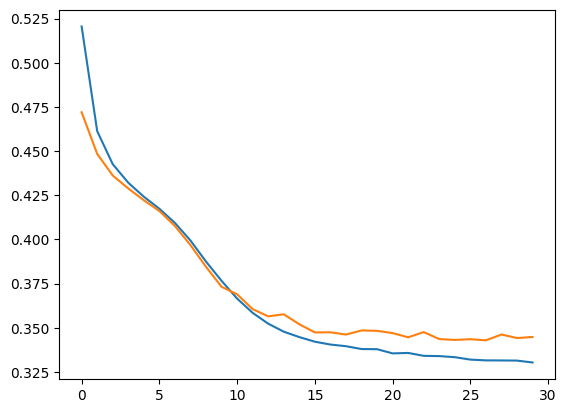

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

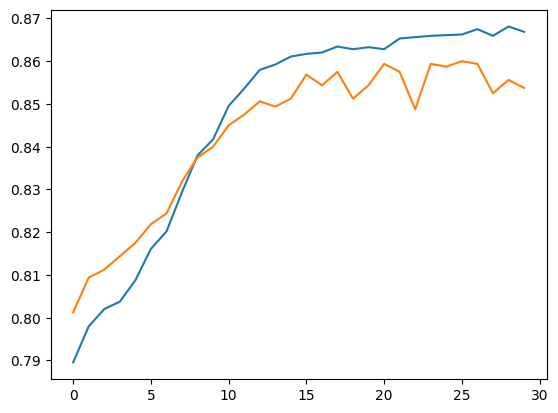

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])